In [34]:
import pandas as pd
import numpy as np

In [35]:
data = pd.read_csv('user.csv',encoding='CP949')

In [36]:
data

,유저,영화,평점
0,동주,타이타닉,5.0
1,동주,500일의썸머,5.0
2,동주,어벤져스,3.0
3,동주,원더우먼,NaN
4,동주,이터널션샤인,NaN
5,준철,타이타닉,1.0
6,준철,500일의썸머,NaN
7,준철,어벤져스,1.0
8,준철,원더우먼,3.0
9,준철,이터널션샤인,5.0


In [37]:
ratings = data.pivot_table(index='유저',columns='영화',values='평점')
ratings

영화,500일의썸머,굿윌헌팅,라라랜드,어벤져스,원더우먼,이터널션샤인,타이타닉,포레스트검프
유저,,,,,,,,
동주,5.0,NaN,3.0,3.0,NaN,NaN,5.0,5.0
상현,1.0,NaN,1.0,1.0,NaN,1.0,1.0,2.0
새봄,NaN,NaN,3.0,5.0,5.0,NaN,1.0,2.0
재경,3.0,2.0,NaN,5.0,5.0,5.0,NaN,5.0
주남,4.0,NaN,4.0,1.0,1.0,NaN,5.0,4.0
준철,NaN,4.0,1.0,1.0,3.0,5.0,1.0,3.0


In [38]:
ratings.index

Index(['동주', '상현', '새봄', '재경', '주남', '준철'], dtype='object', name='유저')

In [40]:
from itertools import product
index_pair = list(product(ratings.index,repeat=2))
index_pair

[('동주', '동주'),
 ('동주', '상현'),
 ('동주', '새봄'),
 ('동주', '재경'),
 ('동주', '주남'),
 ('동주', '준철'),
 ('상현', '동주'),
 ('상현', '상현'),
 ('상현', '새봄'),
 ('상현', '재경'),
 ('상현', '주남'),
 ('상현', '준철'),
 ('새봄', '동주'),
 ('새봄', '상현'),
 ('새봄', '새봄'),
 ('새봄', '재경'),
 ('새봄', '주남'),
 ('새봄', '준철'),
 ('재경', '동주'),
 ('재경', '상현'),
 ('재경', '새봄'),
 ('재경', '재경'),
 ('재경', '주남'),
 ('재경', '준철'),
 ('주남', '동주'),
 ('주남', '상현'),
 ('주남', '새봄'),
 ('주남', '재경'),
 ('주남', '주남'),
 ('주남', '준철'),
 ('준철', '동주'),
 ('준철', '상현'),
 ('준철', '새봄'),
 ('준철', '재경'),
 ('준철', '주남'),
 ('준철', '준철')]

# Contents base filtering

내용 기반(Content-based) 추천은 각 사용자가 구매/만족했던 상품과 유사한 것을 추천하는 방법이다.



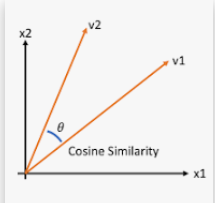


$$
CosineSimilarity(X,Y)=\frac{ X \cdot Y}{||X|| \cdot ||Y||}
$$


In [7]:
def get_cosine_similarity(u1,u2):
    mask=np.isfinite(u1) & np.isfinite(u2)
    u=u1[mask]
    v=u2[mask]
    uvdot=(u*v).sum()
    norm1=(u**2).sum()
    norm2=(v**2).sum()
    score = uvdot/np.sqrt(norm1*norm2)
    return score
    

In [41]:
sample = np.array([3,np.nan,4,5])
sample2 = np.array([np.nan,2,1,3])
get_cosine_similarity(sample,sample2)

0.9383431168171101

In [73]:
def get_cosine_similarity_table(ratings):
    index_pair = list(product(ratings.index,repeat=2))
    similarity_list=[]
    for u1,u2 in index_pair:
        u,v =ratings.loc[u1],ratings.loc[u2]
        score=get_cosine_similarity(u,v)
        similarity= { 'u':u1,
                      'v':u2,
                      'score':score,}
        similarity_list.append(similarity)
    
    similarity_list=pd.DataFrame(similarity_list)
    similarity_table=pd.pivot_table(similarity_list,index="u",columns="v",values="score")
    return similarity_table

In [74]:
similarity_table=get_cosine_similarity_table(ratings)
similarity_table

v,동주,상현,새봄,재경,주남,준철
u,,,,,,
동주,1.000000,0.953206,0.757317,0.932203,0.964345,0.910182
상현,0.953206,1.000000,0.786796,0.948504,0.904194,0.813733
새봄,0.757317,0.786796,1.000000,0.942809,0.569576,0.818317
재경,0.932203,0.948504,0.942809,1.000000,0.785905,0.860828
주남,0.964345,0.904194,0.569576,0.785905,1.000000,0.710239
준철,0.910182,0.813733,0.818317,0.860828,0.710239,1.000000


In [44]:
ratings.T

유저,동주,상현,새봄,재경,주남,준철
영화,,,,,,
500일의썸머,5.0,1.0,NaN,3.0,4.0,NaN
굿윌헌팅,NaN,NaN,NaN,2.0,NaN,4.0
라라랜드,3.0,1.0,3.0,NaN,4.0,1.0
어벤져스,3.0,1.0,5.0,5.0,1.0,1.0
원더우먼,NaN,NaN,5.0,5.0,1.0,3.0
이터널션샤인,NaN,1.0,NaN,5.0,NaN,5.0
타이타닉,5.0,1.0,1.0,NaN,5.0,1.0
포레스트검프,5.0,2.0,2.0,5.0,4.0,3.0


In [45]:
movie_similarity_table=get_cosine_similarity_table(ratings.T)
movie_similarity_table

v,500일의썸머,굿윌헌팅,라라랜드,어벤져스,원더우먼,이터널션샤인,타이타닉,포레스트검프
u,,,,,,,,
500일의썸머,1.000000,1.000000,0.968364,0.816830,0.745241,0.992278,0.993912,0.970720
굿윌헌팅,1.000000,1.000000,1.000000,0.613941,0.843661,0.948683,1.000000,0.843661
라라랜드,0.968364,1.000000,1.000000,0.821995,0.729293,0.832050,0.915737,0.919145
어벤져스,0.816830,0.613941,0.821995,1.000000,0.966755,0.835400,0.609712,0.822464
원더우먼,0.745241,0.843661,0.729293,0.966755,1.000000,0.970143,0.422890,0.843274
이터널션샤인,0.992278,0.948683,0.832050,0.835400,0.970143,1.000000,0.832050,0.954053
타이타닉,0.993912,1.000000,0.915737,0.609712,0.422890,0.832050,1.000000,0.937889
포레스트검프,0.970720,0.843661,0.919145,0.822464,0.843274,0.954053,0.937889,1.000000


In [46]:
neighbors_ratings = ratings["라라랜드"].drop(index="동주")
print(neighbors_ratings)

유저
상현    1.0
새봄    3.0
재경    NaN
주남    4.0
준철    1.0
Name: 라라랜드, dtype: float64


In [66]:
def predict_rating(user_name,movie_name):
    neighbors_ratings = ratings[movie_name].drop(index=user_name)
#     print(neighbors_ratings)
    neighbors_similarity = similarity_table[user_name].drop(index=user_name)
#     print(neighbors_similarity)
    nominator=(neighbors_ratings * neighbors_similarity).sum()
    denominator=neighbors_similarity.sum()
    score=nominator/denominator
    return score

In [67]:
def predict_rating_table(ratings):
    rating_combinations=list(product(ratings.index,ratings.columns))
    rating_list=[]
    for user_name,movie_name in rating_combinations:
        rating=predict_rating(user_name,movie_name)
        rating_predict={
            'user':user_name, 'movie':movie_name, 'rating':rating
        }
        rating_list.append(rating_predict)
    
    rating_list=pd.DataFrame(rating_list)
    rating_table=rating_list.pivot_table(index='user',columns='movie',values='rating')
    rating_table=rating_table[ratings.isnull()]
    return rating_table


In [68]:
rating_table=predict_rating_table(ratings)
rating_table

유저
상현    1.0
새봄    NaN
재경    3.0
주남    4.0
준철    NaN
Name: 500일의썸머, dtype: float64
u
상현    0.953206
새봄    0.757317
재경    0.932203
주남    0.964345
준철    0.910182
Name: 동주, dtype: float64
7.607198369252358
4.517254426564122
유저
상현    NaN
새봄    NaN
재경    2.0
주남    NaN
준철    4.0
Name: 굿윌헌팅, dtype: float64
u
상현    0.953206
새봄    0.757317
재경    0.932203
주남    0.964345
준철    0.910182
Name: 동주, dtype: float64
5.505134998133842
4.517254426564122
유저
상현    1.0
새봄    3.0
재경    NaN
주남    4.0
준철    1.0
Name: 라라랜드, dtype: float64
u
상현    0.953206
새봄    0.757317
재경    0.932203
주남    0.964345
준철    0.910182
Name: 동주, dtype: float64
7.992721993717345
4.517254426564122
유저
상현    1.0
새봄    5.0
재경    5.0
주남    1.0
준철    1.0
Name: 어벤져스, dtype: float64
u
상현    0.953206
새봄    0.757317
재경    0.932203
주남    0.964345
준철    0.910182
Name: 동주, dtype: float64
11.275336971670564
4.517254426564122
유저
상현    NaN
새봄    5.0
재경    5.0
주남    1.0
준철    3.0
Name: 원더우먼, dtype: float64
u
상현    0.953206
새봄    0.757317
재경    0.9322

movie,500일의썸머,굿윌헌팅,라라랜드,어벤져스,원더우먼,이터널션샤인,타이타닉,포레스트검프
user,,,,,,,,
동주,NaN,1.218690,NaN,NaN,2.688025,2.250290,NaN,NaN
상현,NaN,1.169186,NaN,NaN,2.728259,NaN,NaN,NaN
새봄,2.498213,1.331389,NaN,NaN,NaN,2.475583,NaN,NaN
재경,NaN,NaN,2.366308,NaN,NaN,NaN,2.537371,NaN
주남,NaN,1.121625,NaN,NaN,NaN,2.131256,NaN,NaN
준철,2.622732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
def predict_movie(user_name,k=1):
    prediction_list = rating_table.loc[user_name].sort_values(ascending=False)
    prediction_list=prediction_list.head(k).index
    return prediction_list


In [53]:
pd.DataFrame(predict_movie("동주",k=3))

,movie
0,원더우먼
1,이터널션샤인
2,굿윌헌팅


In [54]:
def predict_user(movie_name,k=1):
    prediction_list=rating_table[movie_name].sort_values(ascending=False)
    print(prediction_list)
    prediction_list=prediction_list.head(k).index
    return prediction_list


In [56]:
predict_user("500일의썸머")

user
준철    2.622732
새봄    2.498213
동주         NaN
상현         NaN
재경         NaN
주남         NaN
Name: 500일의썸머, dtype: float64


Index(['준철'], dtype='object', name='user')

# Collaborative based Filtering

사용자-사용자 협업 필터링의 핵심은 유사한 취향의 사용자를 찾는 것

특정 사용자의 상품을 평가할떄 이웃

- 이웃의 기준은 유사도가 된다.
- 자기 자신은 이웃에서 제외한다.
- 해당 아이템에 평가를 내린 사람들중에서 최근접 이웃을 고른다. 즉, 아이템에 평가를 내린적 없는 사람들은 고려하지 않는다.
- 유사도가 0 이상인 사람들중에서 최근접 이웃을 고른다. 
- 유사도가 0이상인 이웃이 없다면 그나마 가장 유사도가 가장 큰 한 명을 고른다.

결과적으로 아이템을 산 사람들중에서만 이웃이 지정되기 때문에 **예측하려는 아이템마다 구해지는 이웃이 달라질 수 있다.**

## Pearson Correlation Coefficient

피어슨 상관계수는 Collaborative Filtering에서 유사도 측정 메트릭으로 주로 사용되며, 두 벡터의 선형 상관관계를 위해 사용
피어슨 상관계수는 +1과 -1 사이의 값을 갖는다.<br>
+1에 가까울수록 강한 양의 선형 상관관계가 있다는 것을 의미하고 -1에 가까울수록 강한 음의 선형 상관관계가 있다는 것을 의미.<br> 또한 0은 아무런 선형 상관관계가 없음. 

상품(혹은 유저) $i$와 상품 $j$의 피어슨 상관계수.

$$
Pearson Correlation Coefficient(i,j)=\frac{\sum_{u \in U_{ij}} (r_{ui}-\bar{r_i}) \cdot (r_{uj}-\bar{r_j})}{\sqrt {\sum_{u \in U_{ij}} (r_{ui}-\bar{r_i})^2} \sqrt {\sum_{u \in U_{ij}} (r_{uj}-\bar{r_j})^2}}
$$



In [21]:
def get_pearson_correlation(u, v, epsilon=0.0001):
    mask = (np.isfinite(u) & np.isfinite(v))
    
    u, v = u[mask], v[mask]
    
    u_dev, v_dev = u-u.mean(), v-v.mean()
    u_var, v_var = (u_dev**2).sum(), (v_dev**2).sum()
    
    
    nominator = np.dot(u_dev, v_dev)
    denominator = np.sqrt(u_var * v_var)
    
    pearson_correlation = nominator / (denominator + epsilon)
    
    return pearson_correlation    

In [57]:
# 분모가 0이 되는 경우를 제외하기 위해 최종적으로 분모에 epsilon을 넣어준다.
def get_pearson_correlation_table(ratings, epsilon = 0.0001):
    
    index_pair = list(product(ratings.index, repeat=2))
    similarity_list = []

    for u_name, v_name in index_pair:
        
        u = ratings.loc[u_name]
        v = ratings.loc[v_name]
    
        score = get_pearson_correlation(u, v)

        similarity = {
            'u': u_name,
            'v': v_name,
            'score': score
        }
        
        similarity_list.append(similarity)  
    
    similarity_list = pd.DataFrame(similarity_list)
    similarity_table= pd.pivot_table(similarity_list, index="u", columns="v", values="score")

    return similarity_table

In [58]:
get_pearson_correlation_table(ratings)

v,동주,상현,새봄,재경,주남,준철
u,,,,,,
동주,0.999979,0.408227,-0.845140,-0.499981,0.662112,0.577334
상현,0.408227,0.999880,-0.292759,0.333311,0.147437,0.249992
새봄,-0.845140,-0.292759,0.999992,0.000000,-0.971116,0.153091
재경,-0.499981,0.333311,0.000000,0.999989,-0.577339,-0.301508
주남,0.662112,0.147437,-0.971116,-0.577339,0.999993,-0.243972
준철,0.577334,0.249992,0.153091,-0.301508,-0.243972,0.999994


In [59]:
# 특정 사용자 user_name의 상품 item_name를 예측할 때 user_name의 k명의 이웃들을 구함
# 사용자의 이름(user_name), 해당 영화(item_name), 데이터(ratings), 유사도 테이블(similarity), 이웃의 수(k)


def get_nearest_neighbors(user_name, item_name, ratings, similarity, k):

    max_neighbors_num = similarity.shape[0] - 1
    k = min(k, max_neighbors_num)
    
    # 자기 자신 제외
    neighbors_similarity = similarity[user_name].drop(index=user_name)
    neighbors_ratings = ratings[item_name].drop(index=user_name)
    
    # 해당 상품에 평점을 준 적이 없으면 제외
    neighbors_similarity = neighbors_similarity[neighbors_ratings.notnull()]
    neighbors_ratings = neighbors_ratings[neighbors_ratings.notnull()]

    if neighbors_ratings.shape[0] == 0:
        return neighbors_ratings.index
        
    neighbors_similarity = neighbors_similarity.sort_values(ascending=False)
    candidates = neighbors_similarity[neighbors_similarity > 0]

    if (candidates.shape[0]) == 0:
        nearest_neighbors = neighbors_similarity.head(1)
    else:
        nearest_neighbors = candidates.head(k)

    return nearest_neighbors.index

In [60]:
pearson_correlation = get_pearson_correlation_table(ratings)
pd.DataFrame(get_nearest_neighbors('재경', '어벤져스', ratings, pearson_correlation, k=2))

,u
0,상현


In [61]:

cosine_correlation = get_cosine_similarity_table(ratings)
pd.DataFrame(get_nearest_neighbors('동주', '이터널션샤인', ratings, pearson_correlation, k=3))

,u
0,준철
1,상현


### 사용자 기반 혹은 아이템 기반 기법

유사도가 높은 k개의 상품/사용자에 더 큰 가중치를 주는 방법

1. 특정 유사도 메트릭에 따라 사용자 $u$와 유사한 k명(혹은 이하)의 이웃을 결정합니다.
2. 유사한 k명의 사용자가 상품 $i$에 내린 ratings에 각각 k명의 사용자가 내린 ratings의 평균을 뺀 값에 대해 유사도에 따른 가중 평균을 구합니다.
3. 사용자 $u$이 내린 ratings 값의 평균을 더하여 값을 보정해줍니다.

$$
\hat r_{ui} = \bar r_u + \frac{\sum_{v \in {N_i}^k(u)}{similarity(u,v)} \cdot (r_{vi}-\bar r_v)}{\sum_{v \in {N_i}^k(u)}{similarity(u,v)}}
$$

In [27]:
# 특정 사용자의 상품의 평점을 예측

def user_rating_predict(user_name, item_name, ratings, similarity, k, epsilon=0.0001):

    nearest_neighbors = get_nearest_neighbors(user_name, item_name, ratings, similarity, k)
    
    if len(nearest_neighbors) == 0:
        return np.nan
    
    nn_similarity = similarity.loc[user_name, nearest_neighbors]
    nn_ratings = ratings.loc[nearest_neighbors, item_name]
    
    # 이웃들이 예측하려는 상품에 내린 평점의 평균.
    neighbors_rating_mean = nn_ratings.mean()
    # 예측하려는 사용자가 해당 해당상품에 내린 평점의 평균.  
    u_rating_mean = ratings.loc[user_name].mean()
    

    nominator = np.dot(nn_similarity,(nn_ratings-neighbors_rating_mean))
    denominator = nn_similarity.sum()
    prediction = u_rating_mean + nominator / (denominator + epsilon)
    
    return prediction

In [62]:

pearson_correlation = get_pearson_correlation_table(ratings)

user_rating_predict('동주', '원더우먼', ratings, pearson_correlation, k=3)

4.131605090183212

In [63]:
# 사용자 기반, 상품 기반 기법 모두 가능
def ratings_predict(ratings, kind='user', k=2, epsilon=0.0001):
    
    if kind == 'movie':
        ratings = ratings.T
    
    similarity = get_pearson_correlation_table(ratings, epsilon)
    prediction_list = []

    
    for u_name, v_name in list(product(ratings.index, ratings.columns)):
        rating = user_rating_predict(u_name, v_name, ratings, similarity, k, epsilon)
        prediction = {
            'u' : u_name,
            'v' : v_name,
            "rating" : rating
        }
        prediction_list.append(prediction)
        
    result = pd.DataFrame(prediction_list).pivot_table(index='u', columns='v', values='rating')
    result = result[ratings.isnull()]
        
    if kind == 'movie':
        return result.T

    return result

In [64]:
ratings_predict(ratings, 'user', k=2, epsilon=0.0001)

v,500일의썸머,굿윌헌팅,라라랜드,어벤져스,원더우먼,이터널션샤인,타이타닉,포레스트검프
u,,,,,,,,
동주,NaN,4.200000,NaN,NaN,4.131605,4.543132,NaN,NaN
상현,NaN,1.023851,NaN,NaN,1.309482,NaN,NaN,NaN
새봄,3.200000,3.200000,NaN,NaN,NaN,3.200000,NaN,NaN
재경,NaN,NaN,4.166667,NaN,NaN,NaN,4.166667,NaN
주남,NaN,3.166667,NaN,NaN,NaN,3.166667,NaN,NaN
준철,3.362657,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
ratings_predict(ratings, 'movie', k=2, epsilon=0.0001)

u,500일의썸머,굿윌헌팅,라라랜드,어벤져스,원더우먼,이터널션샤인,타이타닉,포레스트검프
v,,,,,,,,
동주,NaN,3.0,NaN,NaN,3.5,3.666667,NaN,NaN
상현,NaN,3.0,NaN,NaN,3.5,NaN,NaN,NaN
새봄,3.176993,3.0,NaN,NaN,NaN,3.361030,NaN,NaN
재경,NaN,NaN,2.160475,NaN,NaN,NaN,2.567814,NaN
주남,NaN,3.0,NaN,NaN,NaN,3.666667,NaN,NaN
준철,3.279693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
